1. (2x) Support vector classification for electronic band gap type.


(a) Read in the JSON file with the cleaned electronic band gap type data for zincblende structure materials, and the JSON file with the elemental properties. Convert both to dictionary-like objects.

In [1]:
import json, sys, os
from google.colab import drive
drive.mount('/content/drive')

f = open("/content/drive/MyDrive/Colab Notebooks/rocksalt_Egaptype_AFLOW.json", "r+")
zincblende_EgaptypeClean = json.load(f)
f.close()
# print(zincblende_EgaptypeClean)  #  already in dictionary-like form

f2 = open("/content/drive/MyDrive/Colab Notebooks/Chemical_element_data.json", "r+")
Chemical_element_data = json.load(f2)
f2.close()
# print(Chemical_element_data)  #  already in dictionary-like form

drive.flush_and_unmount()

Mounted at /content/drive


(b) Generate the feature vectors based on the means and differences of the electronegativities, ionization energies, valences and atomic masses (8 features, see example in Lecture 17). Assign the metals to class zero and the insulators to class 1. Generate the training and test sets.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

x_list = []
y_list = []

for datum in zincblende_EgaptypeClean:
    species1 = datum["species"][0]
    species2 = datum["species"][1]
    en_mean = abs(Chemical_element_data[species1]["electronegativity"] + Chemical_element_data[species2]["electronegativity"]) / 2.0
    en_diff = abs(Chemical_element_data[species1]["electronegativity"] - Chemical_element_data[species2]["electronegativity"])
    ie_mean = abs(Chemical_element_data[species1]["first_ionization_energy"] + Chemical_element_data[species2]["first_ionization_energy"]) / 2.0
    ie_diff = abs(Chemical_element_data[species1]["first_ionization_energy"] - Chemical_element_data[species2]["first_ionization_energy"])
    val_mean = abs(Chemical_element_data[species1]["valence"] + Chemical_element_data[species2]["valence"]) / 2.0
    val_diff = abs(Chemical_element_data[species1]["valence"] - Chemical_element_data[species2]["valence"])
    am_mean = abs(Chemical_element_data[species1]["atomic_mass"] + Chemical_element_data[species2]["atomic_mass"]) / 2.0
    am_diff = abs(Chemical_element_data[species1]["atomic_mass"] - Chemical_element_data[species2]["atomic_mass"])
    x_list.append([en_mean, en_diff, ie_mean, ie_diff, val_mean, val_diff, am_mean, am_diff])
    if "metal" in datum["Egap_type"]:
        y_list.append(0)  #  if Egap_type is metal, assign to class 0
    else:
        y_list.append(1)  #  otherwise, assign to class 1

x = np.array(x_list)
y = np.array(y_list)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

(c) Split the sample set into training and test sets. Fit the data using a support vector classifier with the radial basis kernel and a value of gamma of 0.5, using GridSearchCV to optimize the regularization parameter C for a parameter grid of [0.1, 0.5, 1.0, 2.0, 5.0, 10]. What is the accuracy score for the optimized classifier for the test set?

In [3]:
#  Sample set already split into training and testing sets in part b

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel = "rbf", gamma = 0.5))])
param_grid = {"svc__C": [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}
grid_search = GridSearchCV(pipe, param_grid = param_grid, cv = 5, return_train_score = True)
grid_search.fit(x_train, y_train)

print("Best accuracy on training set: ", grid_search.best_score_)
print("Accuracy on test set: ", grid_search.score(x_test, y_test))
print("Best estimator: ", grid_search.best_estimator_)
print("Optimal C value:", grid_search.best_params_)

Best accuracy on training set:  0.7679841897233203
Accuracy on test set:  0.6578947368421053
Best estimator:  Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(gamma=0.5))])
Optimal C value: {'svc__C': 1.0}




2. (2x) Kernel ridge regression for electronic band gap.



(a) Read in the JSON file with the cleaned electronic band gap data (insulators only) for zincblende structure materials, and the JSON file with the elemental properties. Convert both to dictionary-like objects.

In [4]:
import json
from google.colab import drive
drive.mount('/content/drive')

f = open("/content/drive/MyDrive/Colab Notebooks/rocksalt_Egap_insulators_AFLOW.json", "r+")
zincblende_EgapClean = json.load(f)
f.close()
print(zincblende_EgapClean)  #  already dictionary-like object

f2 = open("/content/drive/MyDrive/Colab Notebooks/Chemical_element_data.json", "r+")
Chemical_element_data = json.load(f2)
f2.close()
print(Chemical_element_data)  #  already dictionary-like object

drive.flush_and_unmount()

Mounted at /content/drive
[{'compound': 'Ag1Br1', 'auid': 'aflow:1ffe490975e7aeeb', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Ag1Br1_ICSD_52246', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Ag', 'Br'], 'Egap': 1.5727, 'Egap_type': 'insulator-indirect', 'aflow_prototype_label_relax': 'AB_cF8_225_a_b'}, {'compound': 'Ag1Cl1', 'auid': 'aflow:1b9d91d05f2e4c8c', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Ag1Cl1_ICSD_64734', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Ag', 'Cl'], 'Egap': 1.9714, 'Egap_type': 'insulator-indirect', 'aflow_prototype_label_relax': 'AB_cF8_225_a_b'}, {'compound': 'Ag1F1', 'auid': 'aflow:bcee7bb7be81cfb8', 'aurl': 'aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Ag1F1_ICSD_18008', 'spacegroup_relax': 225, 'Pearson_symbol_relax': 'cF8', 'species': ['Ag', 'F'], 'Egap': 1.0812, 'Egap_type': 'insulator-indirect', 'aflow_prototype_label_relax': 'AB_cF8_225_a_b'}, {'compound': 'Ag1I1', 'auid': 'aflow:382493c94d10

(b) Generate the feature vectors based on the means and differences of the electronegativities, ionization energies, valences and atomic masses (8 features, see example in Lecture 17). Generate the training and test sets.

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

x_list = []
y_list = []

for datum in zincblende_EgapClean:
    species1 = datum["species"][0]
    species2 = datum["species"][1]
    en_mean = abs(Chemical_element_data[species1]["electronegativity"] + Chemical_element_data[species2]["electronegativity"]) / 2.0
    en_diff = abs(Chemical_element_data[species1]["electronegativity"] - Chemical_element_data[species2]["electronegativity"])
    ie_mean = abs(Chemical_element_data[species1]["first_ionization_energy"] + Chemical_element_data[species2]["first_ionization_energy"]) / 2.0
    ie_diff = abs(Chemical_element_data[species1]["first_ionization_energy"] - Chemical_element_data[species2]["first_ionization_energy"])
    val_mean = abs(Chemical_element_data[species1]["valence"] + Chemical_element_data[species2]["valence"]) / 2.0
    val_diff = abs(Chemical_element_data[species1]["valence"] - Chemical_element_data[species2]["valence"])
    am_mean = abs(Chemical_element_data[species1]["atomic_mass"] + Chemical_element_data[species2]["atomic_mass"]) / 2.0
    am_diff = abs(Chemical_element_data[species1]["atomic_mass"] - Chemical_element_data[species2]["atomic_mass"])
    x_list.append([en_mean, en_diff, ie_mean, ie_diff, val_mean, val_diff, am_mean, am_diff])
    y_list.append(float(datum["Egap"]))

print(x_list)
print(y_list)

x = np.array(x_list)
y = np.array(y_list)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

[[2.3499999999999996, 0.8999999999999999, 936.0, 408.0, 4.0, 6.0, 93.898, 27.964], [2.45, 1.1, 996.0, 528.0, 4.0, 6.0, 71.6685, 72.423], [2.95, 2.1, 1206.0, 948.0, 4.0, 6.0, 63.44, 88.88], [2.2, 0.6000000000000001, 871.0, 278.0, 4.0, 6.0, 117.4, 19.040000000000006], [2.25, 1.5, 988.5, 823.0, 4.0, 2.0, 20.488999999999997, 12.962], [2.2, 2.6, 906.0, 808.0, 4.0, 4.0, 76.68, 121.36000000000001], [1.7, 1.6, 751.0, 498.0, 4.0, 4.0, 84.71300000000001, 105.29400000000001], [1.65, 1.5, 271.5, 461.0, 4.0, 4.0, 108.16, 58.40000000000002], [1.5, 1.2000000000000002, 686.0, 368.0, 4.0, 4.0, 132.485, 9.750000000000014], [2.5, 2.0, 1105.0, 410.0, 4.0, 4.0, 12.506499999999999, 6.987], [2.0, 1.0, 950.0, 100.0, 4.0, 4.0, 20.5395, 23.053000000000004], [1.7999999999999998, 1.9999999999999998, 779.0, 722.0, 4.0, 6.0, 59.506, 40.82], [1.7999999999999998, 1.9999999999999998, 771.0, 738.0, 4.0, 6.0, 82.69800000000001, 5.564000000000007], [2.25, 2.5, 950.0, 720.0, 4.0, 4.0, 28.04, 24.08], [1.75, 1.5, 795.0, 410

(c) Split the sample set into training and test sets. Fit the data using kernel ridge regression with the radial basis kernel, using GridSearchCV to optimize the regularization parameter alpha for a parameter grid of [0.1, 0.5, 1.0, 2.0, 5.0, 10] and the parameter gamma for a parameter grid of [0.1,0.5,1.0,2.0,5.0]. What is the accuracy score for the optimized model for the test set?

In [6]:
#  Sample set already split into training and testing sets in part b

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge

pipe = Pipeline([("scaler", StandardScaler()), ("krr", KernelRidge(kernel = "rbf"))])
param_grid = {"krr__alpha": [0.1, 0.5, 1.0, 2.0, 5.0, 10.0], "krr__gamma": [0.1, 0.5, 1.0, 2.0, 5.0]}
grid_search = GridSearchCV(pipe, param_grid = param_grid, cv = 5, return_train_score = True)
grid_search.fit(x_train, y_train)

print("Best accuracy on training set: ", grid_search.best_score_)
print("Accuracy on test set: ", grid_search.score(x_test, y_test))
print("Best estimator: ", grid_search.best_estimator_)

Best accuracy on training set:  0.6159672623221918
Accuracy on test set:  0.811653024338373
Best estimator:  Pipeline(steps=[('scaler', StandardScaler()),
                ('krr', KernelRidge(alpha=0.1, gamma=0.1, kernel='rbf'))])


3. (2x) Bayesian optimization using Gaussian process regression.

Consider the following function:

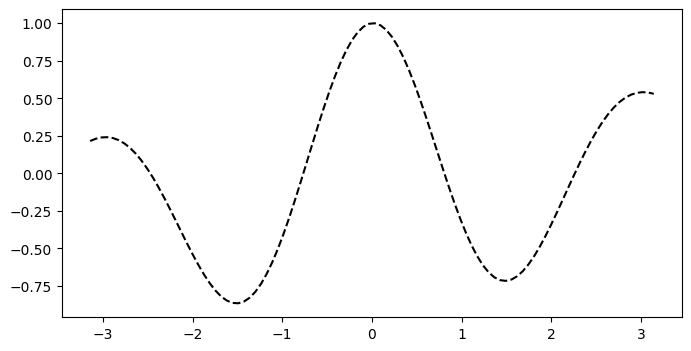

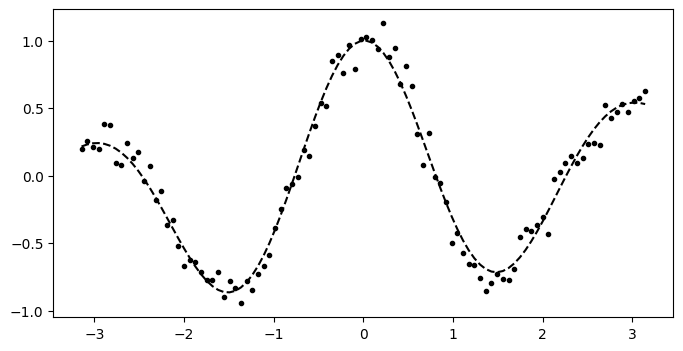

In [7]:
import numpy as np
from matplotlib import pyplot as plt

def f(xi):
  return np.cos(xi * 2) * np.exp(-0.1 * xi**2) + 0.05 * xi

N = 100
X_grid = np.linspace(-np.pi, np.pi, N)[:,None]
Y_grid = f(X_grid)
Y_grid.shape

# Show function
FIGSIZE = (8, 5)
plt.figure(figsize=(8,4))
plt.plot(X_grid, Y_grid,'k--')

# Show function with noise
plt.figure(figsize=(8,4))
plt.plot(X_grid, Y_grid,'k--')
plt.plot(X_grid, Y_grid + np.random.normal(0., .1, X_grid.shape) ,'k.')

Install GPy and GPyOpt

In [8]:
!pip install GPy
!pip install GPyOpt

Import the GPy and GPyOpt modules

In [9]:
!pip install scipy==1.12.0
!pip install GPy
!pip install GPyOpt

import GPy
import GPyOpt

(a) Implement a function to perform Gaussian process regression using the GPy package, with a radial basis function kernel, that returns the mean, covariance, variance and model.

In [10]:
def GP_analysis(x, y, x_grid):
    # Use GP regression to fit the data
    k = GPy.kern.RBF(1)  #  GPR with RBF kernel
    m = GPy.models.GPRegression(x, y, k)  #  fit GPR model to data
    m.optimize("bfgs", max_iters = 100)  #  optimize model

    # Predict the mean and covariance of the GP fit over the grid
    mean, cov = m.predict(x_grid, full_cov = True)  #  predict mean and covariance for full x_grid
    variance = np.diag(cov)  #  calculates variance
    return mean, cov, variance, m

(b) For the function given above, sample 5 points randomly on the x-axis, and evaluate them with noise. Use the results to fit the Gaussian Process Regressor in part (a). Print the prediction for the mean and maximum value of the variance.

In [11]:
import numpy as np

num_measurements = 5  #  sample 5 points
x_samples = np.random.uniform(-np.pi, np.pi * 3/4, (num_measurements, 1))  #  sample x values
y_samples = f(x_samples) + np.random.normal(0., .1, (x_samples.shape[0], 1))  #  y values at x with noise

gp_mean, gp_cov, gp_var, gp_model = GP_analysis(x_samples, y_samples, X_grid)

print("Predicted mean: ", gp_mean)
print("Predicted maximum value of variance: ", np.max(gp_var))

Predicted mean:  [[ 0.36504303]
 [ 0.34108004]
 [ 0.31318268]
 [ 0.28134439]
 [ 0.24560169]
 [ 0.2060364 ]
 [ 0.16277732]
 [ 0.11600131]
 [ 0.06593373]
 [ 0.01284824]
 [-0.04293415]
 [-0.10104668]
 [-0.16107928]
 [-0.22258156]
 [-0.28506665]
 [-0.34801562]
 [-0.41088249]
 [-0.47309986]
 [-0.53408494]
 [-0.59324609]
 [-0.64998955]
 [-0.70372645]
 [-0.75387995]
 [-0.79989233]
 [-0.84123204]
 [-0.87740048]
 [-0.90793852]
 [-0.93243257]
 [-0.95052016]
 [-0.96189492]
 [-0.96631089]
 [-0.96358605]
 [-0.95360511]
 [-0.93632143]
 [-0.91175805]
 [-0.88000788]
 [-0.84123296]
 [-0.79566286]
 [-0.74359227]
 [-0.6853777 ]
 [-0.6214335 ]
 [-0.55222711]
 [-0.47827376]
 [-0.4001306 ]
 [-0.31839031]
 [-0.23367443]
 [-0.14662641]
 [-0.05790443]
 [ 0.03182577]
 [ 0.12189809]
 [ 0.2116531 ]
 [ 0.30044488]
 [ 0.38764756]
 [ 0.47266143]
 [ 0.55491864]
 [ 0.63388834]
 [ 0.70908131]
 [ 0.78005386]
 [ 0.84641116]
 [ 0.90780988]
 [ 0.96396008]
 [ 1.01462648]
 [ 1.05962897]
 [ 1.09884252]
 [ 1.13219634]
 [ 1.159

(c) Starting from the 5 samples selected in part (c), use 10 iterations of exploration (selecting the maximum value of the variance as the next argument) to determine the values of the function. What is the maximum value of the mean over the sampled values?

In [12]:
number_of_iterations = 10

#  The position x and the value y of the true max
true_max_x = X_grid[np.argmax(Y_grid)]
true_max_y = np.max(Y_grid)

#  We will use this matrix to store the GP mean at every iteration
y_estimates = np.full((len(X_grid), number_of_iterations), np.nan)
all_means = []

#  Perform 10 iterations of exploration
for i in range(number_of_iterations):
    #  Use GP regression to fit the data
    mean, cov, variance, m = GP_analysis(x_samples, y_samples, X_grid)
    all_means.append(mean)

    #  Find the x value where the GP reaches a maximum
    alpha_full = mean
    next_sample_index = np.argmax(alpha_full)  #  selects point

    #  Add the desired sample to our data
    x_samples = np.vstack((x_samples, X_grid[next_sample_index, :]))
    y_samples = np.vstack((y_samples, Y_grid[next_sample_index, 0]))

    #  Store the GP mean for this iteration.
    y_estimates[:, i] = mean.ravel()

max_mean = np.max(all_means)
print("Maximum value of the mean over the sampled values: ", max_mean)

Maximum value of the mean over the sampled values:  1.2121713549629867


(d) Starting from the samples in part (c), use the expected improvement acquisition function from GPyOpt to find the maximum value of the function.

In [13]:
from GPyOpt.acquisitions import AcquisitionEI
from GPyOpt import Design_space
from GPyOpt.models import GPModel

#  Number of samples
num_measurements = 2

#  Random sample locations
x_samples = np.random.uniform(-np.pi, np.pi * 3/4, (num_measurements, 1))

#  Get the function value
y_samples = f(x_samples)

#  Create necessary variables
space = Design_space([{'name': 'var_1', 'type': 'continuous', 'domain': (-np.pi, np.pi * 3/4)}] )

for i in range(number_of_iterations):
    # Use GP regression to fit data
    mean, Cov, variance, m = GP_analysis(x_samples, y_samples, X_grid)
    model = GPModel(optimize_restarts=1,verbose=False)
    model.model = m

    # find sample
    acq_EI = AcquisitionEI(model,space) # beta is constant = 2
    alpha_full = acq_EI.acquisition_function(X_grid)
    next_sample_index = np.argmax(alpha_full)

    # add desired sample to our data
    X_samples = np.vstack((x_samples,X_grid[next_sample_index,:]))
    Y_samples = np.vstack((y_samples, Y_grid[next_sample_index,0]))

max_value = np.max(Y_samples)
print("Maximum value of the function: ", max_value)

Maximum value of the function:  0.48569824153435925
